In [1]:
import arcpy

In [2]:
arcpy.env.workspace = "../data/shp/china"

In [3]:
arcpy.Select_analysis("china.shp","china2.shp")

<Result '../data/shp/china\\china2.shp'>

In [6]:
print([f.name for f in arcpy.ListFields("china2.shp")])

['FID', 'Shape', 'FIRST_NAME', 'Code', 'AREA', 'Pop_2009', 'Pop_2005', 'Pop_2000', 'Pop_1999', 'Pop_1995', 'Pop_1990', 'Pop_Birth_', 'Pop_Death_', 'GDP_2009', 'GDP_2008', 'GDP_2007', 'GDP_2006', 'GDP_2005', 'CPI_2009', 'CATEGORIES', 'cg2009']


In [5]:
arcpy.AddField_management("china2.shp","cg2009","FLOAT")

<Result '../data/shp/china\\china2.shp'>

In [7]:
arcpy.CalculateField_management("china2.shp","cg2009","!GDP_2009!/!Pop_2009!")

ZeroDivisionError: float division by zero

ExecuteError: ERROR 999999: Something unexpected caused the tool to fail. Contact Esri Technical Support (http://esriurl.com/support) to Report a Bug, and refer to the error help for potential solutions or workarounds.
Failed to execute (CalculateField).


In [8]:
with arcpy.da.UpdateCursor("china2.shp",["Pop_2009","GDP_2009",
                                        "cg2009","FIRST_NAME"],"Pop_2009 > 0") as upc:
    for u in upc:
        u[2] = u[1] / u[0]
        print(u)
        upc.updateRow(u)

[1755.0, 12153.03, 6.924803418803419, '北京']
[1228.16, 7521.85, 6.1244870375195415, '天津']
[3427.36, 7358.31, 2.1469323327575744, '山西']
[4319.0, 15212.49, 3.5222250520953926, '辽宁']
[2739.55, 7278.75, 2.6569144567538463, '吉林']
[3826.0, 8587.0, 2.2443805541035022, '黑龙江']
[1921.0, 15046.45, 7.832613222280063, '上海']
[7725.0, 34457.3, 4.460491909385114, '江苏']
[5180.0, 22990.35, 4.438291505791505, '浙江']
[6131.0, 10062.82, 1.6413015821236339, '安徽']
[3627.0, 12236.53, 3.373733112765371, '福建']
[4432.1581, 7655.18, 1.7271901920646742, '江西']
[9470.3, 33896.65, 3.5792583128306394, '山东']
[9487.0, 19480.46, 2.0533846316011384, '河南']
[5720.0, 12961.1, 2.2659265734265737, '湖北']
[6406.0, 13059.69, 2.0386653137683424, '湖南']
[9638.0, 39482.56, 4.096551151691222, '广东']
[4856.0, 7759.16, 1.597850082372323, '广西']
[864.07, 1654.21, 1.9144398023308296, '海南']
[2859.0, 6530.01, 2.28401888772298, '重庆']
[8185.0, 14151.28, 1.7289285277947466, '四川']
[3798.0, 3912.68, 1.0301948393891522, '贵州']
[4571.0, 6169.75, 1.3497

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [10]:
d = arcpy.da.FeatureClassToNumPyArray("china2.shp",["FIRST_NAME","cg2009"])

In [12]:
d = numpy.sort(d,order="cg2009")
d

array([('台湾', 0.     ), ('贵州', 1.03019), ('甘肃', 1.28538), ('云南', 1.34976),
       ('西藏', 1.52177), ('广西', 1.59785), ('安徽', 1.6413 ), ('江西', 1.72719),
       ('四川', 1.72893), ('海南', 1.91444), ('青海', 1.94019), ('新疆', 1.98137),
       ('湖南', 2.03867), ('河南', 2.05338), ('山西', 2.14693), ('宁夏', 2.1646 ),
       ('陕西', 2.16591), ('黑龙江', 2.24438), ('湖北', 2.26593),
       ('重庆', 2.28402), ('河北', 2.45017), ('吉林', 2.65691), ('福建', 3.37373),
       ('辽宁', 3.52223), ('山东', 3.57926), ('内蒙古', 4.02146),
       ('广东', 4.09655), ('浙江', 4.43829), ('江苏', 4.46049), ('天津', 6.12449),
       ('北京', 6.9248 ), ('上海', 7.83261)],
      dtype=[('FIRST_NAME', '<U60'), ('cg2009', '<f4')])

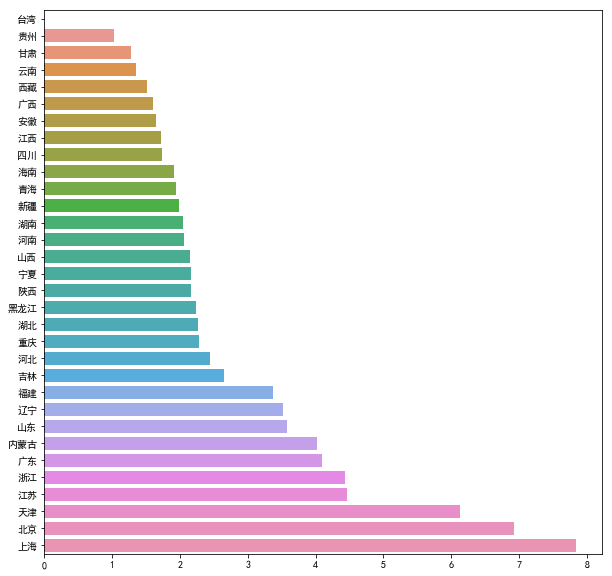

In [13]:
fig = plt.figure(figsize=(10,10))
sns.barplot(d["cg2009"],d["FIRST_NAME"])

In [14]:
arcpy.AddField_management("china2.shp","ag2009","FLOAT")
with arcpy.da.UpdateCursor("china2.shp",["GDP_2005","GDP_2009",
                                        "ag2009","FIRST_NAME"]) as upc:
    for u in upc:
        if u[1] <= 0:
            pass
        else:
            u[2] = (u[1] -u[0])/ u[1] / 5
            print(u)
            upc.updateRow(u)

[6969.52, 12153.03, 0.08530399414796146, '北京']
[3905.64, 7521.85, 0.09615214342216344, '天津']
[4230.53, 7358.31, 0.0850135425117996, '山西']
[8047.26, 15212.49, 0.09420193538335933, '辽宁']
[3620.27, 7278.75, 0.10052495277348446, '吉林']
[5513.7, 8587.0, 0.07158029579597067, '黑龙江']
[9247.66, 15046.45, 0.07707851353641557, '上海']
[18598.69, 34457.3, 0.0920478969623273, '江苏']
[13417.68, 22990.35, 0.08327554821914411, '浙江']
[5350.17, 10062.82, 0.09366459898915015, '安徽']
[6554.69, 12236.53, 0.09286685032439754, '福建']
[4056.76, 7655.18, 0.09401268160905427, '江西']
[18366.87, 33896.65, 0.09163017584333556, '山东']
[10587.42, 19480.46, 0.09130215610924998, '河南']
[6590.19, 12961.1, 0.09830816828818542, '湖北']
[6596.1, 13059.69, 0.09898535110710897, '湖南']
[22557.37, 39482.56, 0.08573501819537538, '广东']
[3984.1, 7759.16, 0.09730589393697256, '广西']
[897.99, 1654.21, 0.09142974592101366, '海南']
[3467.72, 6530.01, 0.09379128056465458, '重庆']
[7385.1, 14151.28, 0.09562640269996778, '四川']
[2005.42, 3912.68, 0.0974

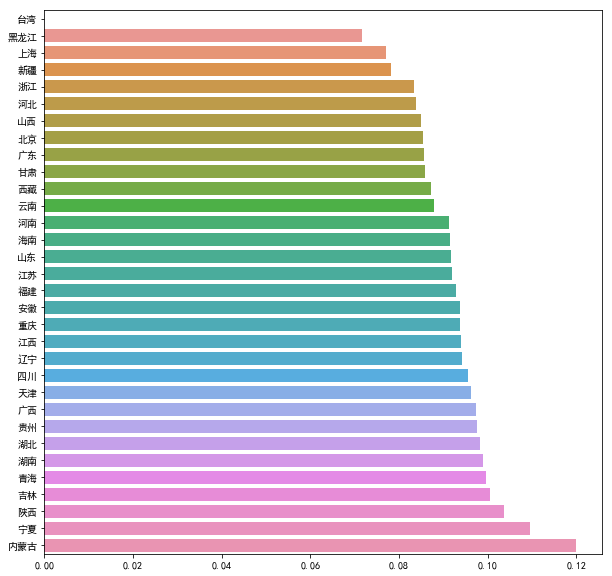

In [15]:
d = arcpy.da.FeatureClassToNumPyArray("china2.shp",["FIRST_NAME","ag2009"])
d = numpy.sort(d,order="ag2009")
fig = plt.figure(figsize=(10,10))
sns.barplot(d["ag2009"],d["FIRST_NAME"])